# Fig 1 RPE UMAP and Analysis

This figure makes plots for the RPE projection.


### Initialization

In [17]:
# Import necessary packages
import os
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import csv
from datetime import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set verbosity and output package versions
sc.settings.verbosity = 2
sc.logging.print_header()

# Fonts for illustrator
import matplotlib.font_manager as fm

# Optional: confirm font file is in the right place
font_path = os.path.expanduser("/home/dalbao/.fonts/arial.ttf")
fm.fontManager.addfont(font_path)
arial_font = fm.FontProperties(fname=font_path)

# Editable text in PDF outputs
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = arial_font.get_name()

scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.1.3 statsmodels==0.14.0 igraph==0.11.3 louvain==0.8.1 pynndescent==0.5.11


Load datasets:

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


['#1f77b4' '#ff7f0e' '#279e68' '#d62728' '#aa40fc' '#8c564b' '#e377c2'
 '#b5bd61' '#17becf' '#aec7e8' '#ffbb78' '#98df8a' '#ff9896' '#c5b0d5']


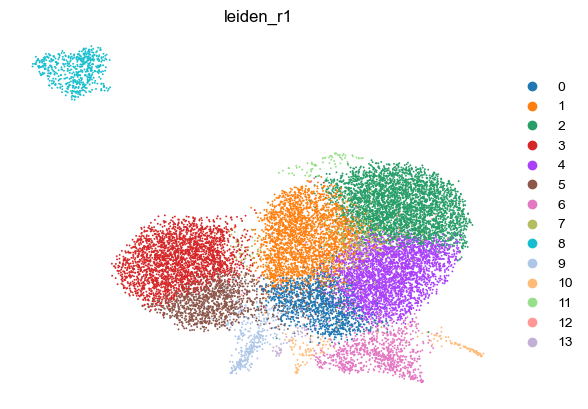

In [18]:
# Set location
os.chdir("/home/dalbao/2023-012-Runx3mutD8scRNA/AlbaoRunx3Manuscript/figures/01")

# Read in the data
adata = ad.read_h5ad("../../h5ad/03_25-12-06-01-06_clustering_RPE.h5ad")

# Check object
adata

# Plot umap with leiden_r1 clustering
sc.pl.umap(adata, color=["leiden_r1"], frameon=False, show=False)

# Colors
print(adata.uns['leiden_r1_colors'])

## Figure UMAP

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


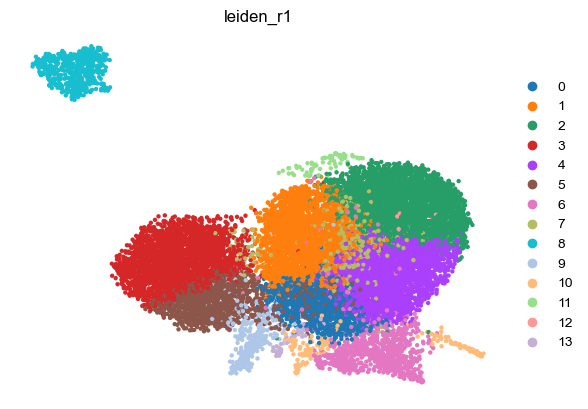

In [3]:
# Plot to PDF
sc.pl.umap(adata, color = 'leiden_r1', frameon = False, size = 40, save = "_Fig1A.pdf")

In [4]:
def plot_highlight_group(adata, group_name, highlight_color, outfile_tag):
    """
    Highlight a single group in adata.obs['group'] on UMAP.
    Ensures highlighted cells are plotted on top.
    """
    # Temporary AnnData used only for plotting
    ad = adata.copy()

    highlight_col = f"highlight_{group_name}"

    # Assign highlight vs other
    ad.obs[highlight_col] = np.where(
        ad.obs["group"] == group_name,
        group_name,
        "Other"
    )

    # Explicitly define category order: Other (bg) first, highlighted second
    ad.obs[highlight_col] = pd.Categorical(
        ad.obs[highlight_col],
        categories=["Other", group_name],
        ordered=True
    )

    # Reorder obs so "Other" rows are drawn first, highlighted last
    ad = ad[ad.obs[highlight_col].cat.codes.argsort()].copy()

    # Colors
    palette = {
        "Other": "lightgrey",
        group_name: highlight_color,
    }

    sc.pl.umap(
        ad,
        color=highlight_col,
        frameon=False,
        size=40,
        palette=palette,
        show=False,
        save=f"_{outfile_tag}.pdf"
    )



# 1) Null = red on top
plot_highlight_group(
    adata, group_name="Null",
    highlight_color="#DC0000",
    outfile_tag="EFig1B_shRunx3"
)

# 2) Base = black on top
plot_highlight_group(
    adata, group_name="Base",
    highlight_color="#4A4D4C",
    outfile_tag="EFig1B_mock"
)

# 3) WT = green on top
plot_highlight_group(
    adata, group_name="WT",
    highlight_color="#00A087",
    outfile_tag="EFig1B_RUNX3OE"
)


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


## Subset Relevant Clusters

In [20]:
# Create a new object adata_sub.obs which only contains the leiden_r1 groups
# '0', '1', '2', '3', '4', '5', '6'
adata_sub = adata[adata.obs['leiden_r1'].isin(['0', '1', '2', '3', '4', '5', '7'])].copy()

# add the prefix WTE to the leiden_r1 groups
adata_sub.obs['leiden_r1'] = 'RPE' + adata_sub.obs['leiden_r1'].astype(str)

# Reconvert into cateogories
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].astype('category')

In [21]:
# Reorder the categories into the desired order
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].cat.reorder_categories(
    ['RPE2', 'RPE4', 'RPE0', 'RPE1', 'RPE3', 'RPE5', 'RPE7'], ordered=True
)

adata_sub.uns['leiden_r1_colors'] = ['#279e68', '#aa40fc', '#1f77b4', '#ff7f0e', '#d62728', '#8c564b', '#b5bd61']

## DotPlots Stem Genes

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


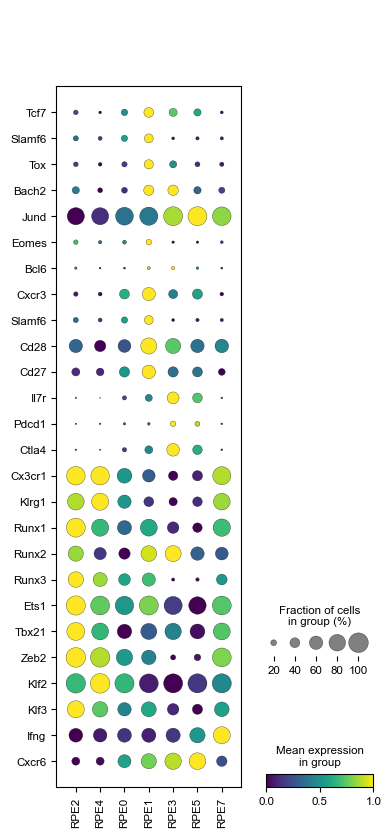

In [22]:
genes = [   'Tcf7',
            'Slamf6',
            'Tox',
            'Bach2',
            'Jund',
            'Eomes',
            'Bcl6',
            'Cxcr3',
            'Slamf6',
            'Cd28',
            'Cd27',
            'Il7r',
            'Pdcd1',
            'Ctla4',
            'Cx3cr1',
            'Klrg1',
            'Runx1',
            'Runx2',
            'Runx3',
            'Ets1',
            'Tbx21',
            'Zeb2',
            'Klf2',
            'Klf3',
            'Ifng',
            'Cxcr6']
# sc.pl.dotplot(adata_sub, genes, groupby='leiden_r1', swap_axes=True, cmap="viridis", save="stem_RPE_dotplot.pdf")
sc.pl.dotplot(adata_sub, genes, groupby='leiden_r1', swap_axes=True, cmap="viridis", standard_scale='var', save = "Fig1D.pdf")

## shRunx3 vs Mock

In [8]:
# ---------------------------------------
# Subset to selected leiden_r1 groups
# ---------------------------------------
adata_sub = adata[adata.obs['leiden_r1'].isin(['0', '1', '2', '4', '8'])].copy()

# Add prefix RPE to leiden_r1 values
adata_sub.obs['leiden_r1'] = 'RPE' + adata_sub.obs['leiden_r1'].astype(str)
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].astype('category')

# ---------------------------------------
# Rename groups
# ---------------------------------------
adata_sub.obs['group_renamed'] = (
    adata_sub.obs['group']
    .replace({'Null': 'shRunx3', 'Base': 'mock', 'Naive': 'naive'})
)

# ---------------------------------------
# Create leiden_group column
# ---------------------------------------
adata_sub.obs['leiden_group'] = (
    adata_sub.obs['leiden_r1'].astype(str)
    + ' '
    + adata_sub.obs['group_renamed'].astype(str)
)
# ---------------------------------------
# Define the desired order of combined clusters
# RPE2 / RPE4 / RPE1 each have mock + shRunx3
# RPE8 only has naive
# ---------------------------------------
ordered_subclusters = [
    'RPE2 mock',
    'RPE2 shRunx3',
    'RPE4 mock',
    'RPE4 shRunx3',
    'RPE0 mock',
    'RPE0 shRunx3',
    'RPE1 mock',
    'RPE1 shRunx3',
    'RPE8 naive'
]

# ---------------------------------------
# Subset adata_sub to cells in those combined groups
# ---------------------------------------
adata_shr = adata_sub[adata_sub.obs['leiden_group'].isin(ordered_subclusters)].copy()

# ---------------------------------------
# Make leiden_group a categorical with the specified order
# set_categories is safer than reorder_categories:
# it will work even if some categories are currently absent
# ---------------------------------------
adata_shr.obs['leiden_group'] = (
    adata_shr.obs['leiden_group']
    .astype('category')
    .cat.set_categories(ordered_subclusters, ordered=True)
)


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


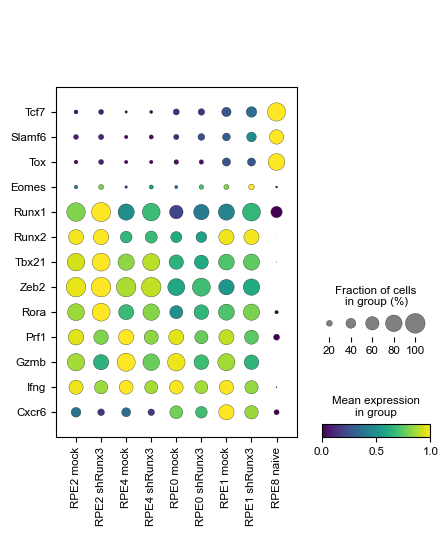

In [9]:
genes = ['Tcf7', 'Slamf6', 'Tox', 'Eomes', 'Runx1', 'Runx2', 'Tbx21', 'Zeb2', 'Rora', 'Prf1', 'Gzmb', 'Ifng', 'Cxcr6']
sc.pl.dotplot(adata_shr, genes, groupby='leiden_group', swap_axes=True, cmap="viridis", standard_scale='var')

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


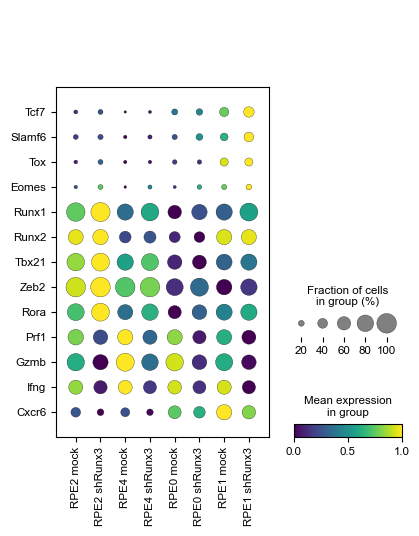

In [10]:
# Subset out RPE8 naive and make a fresh object
adata_no_rpe8 = adata_shr[adata_shr.obs['leiden_group'] != 'RPE8 naive'].copy()

# Remove the now-unused category from leiden_group
adata_no_rpe8.obs['leiden_group'] = (
    adata_no_rpe8.obs['leiden_group']
    .astype('category')
    .cat.remove_unused_categories()
)

sc.pl.dotplot(
    adata_no_rpe8,
    genes,
    groupby='leiden_group',
    swap_axes=True,
    cmap="viridis",
    standard_scale='var',
    save = "EFig1F.pdf"
)


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


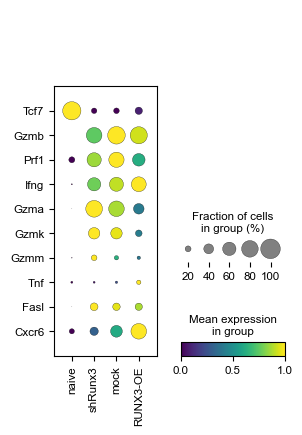

In [11]:
# ---------------------------------------
# Subset to selected leiden_r1 groups
# ---------------------------------------
adata_sub = adata[adata.obs['group'].isin(['Naive', 'Null', 'Base', 'WT'])].copy()

adata_sub.obs['group_renamed'] = (
    adata_sub.obs['group']
    .replace({'Null': 'shRunx3', 'Base': 'mock', 'WT' : 'RUNX3-OE', 'Naive': 'naive'})
)

adata_sub.obs['group_renamed'] = (
    adata_sub.obs['group_renamed']
    .astype('category')
    .cat.set_categories(['naive', 'shRunx3', 'mock', 'RUNX3-OE'], ordered=True)
)

genes = ['Tcf7', 'Gzmb', 'Prf1', 'Ifng', 'Gzma', 'Gzmk', 'Gzmm', 'Tnf', 'Fasl', 'Cxcr6']

sc.pl.dotplot(
    adata_sub,
    genes,
    groupby='group_renamed',
    swap_axes=True,
    cmap="viridis",
    standard_scale='var',
    save = "EFig1I.pdf"
)


In [ ]:
def plot_violin_by_gene(adata, gene, groupby = 'leiden_r1', figsize = (5, 2), ylabel_fontsize = 12, xtick_fontsize = 12):
    """
    Plots a violin plot for the given gene grouped by the specified category.

    Parameters:
    - adata: AnnData object containing the data.
    - gene: str, the gene to analyze.
    - groupby: str, the category to group by (default: 'leiden_r1').
    - figsize: tuple, size of the figure (default: (5, 2)).
    - ylabel_fontsize: int, font size for the Y-axis label (default: 12).
    - xtick_fontsize: int, font size for the X-axis labels (default: 12).
    """
    ax = sc.pl.violin(adata, gene, groupby = groupby, stripplot = False, show = False)
    plt.yticks(fontsize = 10)  # Increase axis number size

    # Resize the figure (width, height) in inches
    ax.figure.set_size_inches(*figsize)  # Adjust to your desired size

    # Remove X-axis title
    ax.set_xlabel("")  # Clears X-axis label

    # Set Y-axis label and size
    ax.set_ylabel(f"{gene} counts", fontsize=ylabel_fontsize)

    # Rotate, align, and resize X-axis labels
    for label in ax.get_xticklabels():
        label.set_rotation(45)                            # Rotate 45 degrees
        label.set_horizontalalignment('right')            # hjust = 1 equivalent
        label.set_verticalalignment('center')             # vjust = 0 equivalent
        label.set_fontsize(xtick_fontsize)                # Change font size
        label.set_position((label.get_position()[0], -0.05))  # Fine-tune vertical offset

    # Save to PDF
    plt.tight_layout()
    plt.savefig(f"figures/{gene}_violin_plot.pdf", format = "pdf")  # Optionally add dpi=300 for high-res raster
    plt.show()

adata_sub.uns['group_renamed_colors'] = [   '#000000',#'#1B1919', 
                                            '#DC0000', 
                                            '#808180', 
                                            '#00A087']

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_548922/3434138758.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


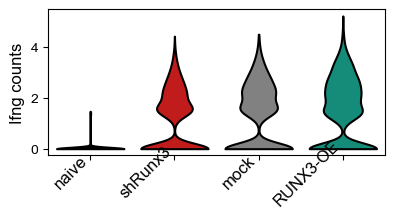

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_548922/3434138758.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


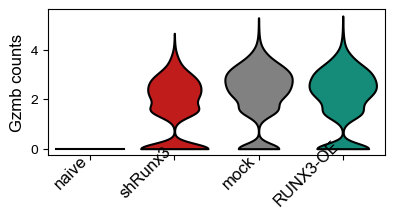

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_548922/3434138758.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


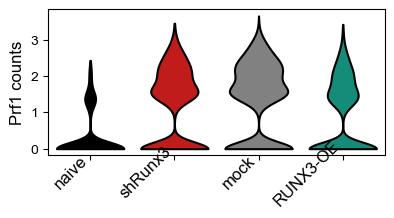

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_548922/3434138758.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


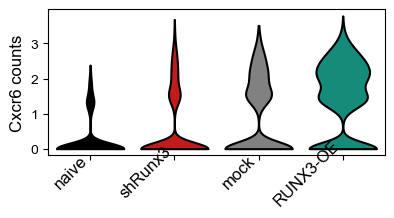

In [13]:
plot_violin_by_gene(adata_sub, 'Ifng', groupby='group_renamed')
plot_violin_by_gene(adata_sub, 'Gzmb', groupby='group_renamed')
plot_violin_by_gene(adata_sub, 'Prf1', groupby='group_renamed')
plot_violin_by_gene(adata_sub, 'Cxcr6', groupby='group_renamed')

## Subset Relevant Clusters

In [14]:
# Create a new object adata_sub.obs which only contains the leiden_r1 groups
# '0', '1', '2', '3', '4', '5', '6'
adata_sub = adata[adata.obs['leiden_r1'].isin(['0', '1', '2', '3', '4', '5', '7', '8'])].copy()

# add the prefix WTE to the leiden_r1 groups
adata_sub.obs['leiden_r1'] = 'RPE' + adata_sub.obs['leiden_r1'].astype(str)

# Reconvert into cateogories
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].astype('category')

In [15]:
# Reorder the categories into the desired order
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].cat.reorder_categories(
    ['RPE2', 'RPE4', 'RPE0', 'RPE1', 'RPE3', 'RPE5', 'RPE7', 'RPE8'], ordered=True
)

adata_sub.uns['leiden_r1_colors'] = ['#279e68', '#aa40fc', '#1f77b4', '#ff7f0e', '#d62728', '#8c564b', '#b5bd61',  '#17becf']

## DotPlots Effector Genes

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


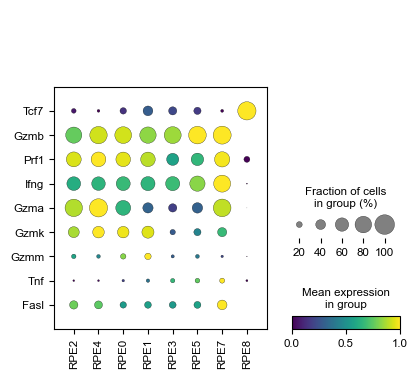

In [16]:
genes = ['Tcf7', 'Gzmb', 'Prf1', 'Ifng', 'Gzma', 'Gzmk', 'Gzmm', 'Tnf', 'Fasl']
# sc.pl.dotplot(adata_sub, genes, groupby='leiden_r1', swap_axes=True, cmap="viridis", save="stem_RPE_dotplot.pdf")
sc.pl.dotplot(adata_sub, genes, groupby='leiden_r1', swap_axes=True, cmap="viridis", standard_scale='var', save = "FigE3A_RPE.pdf")